# Reacher (Continuous Control)

---

Use this notebook to train and/or test your agent for the Reacher environment.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

## 2. Loading the Environment for Training

It automatically detects the platform and assigns the right file to the UnityEnvironment. The assumption is that the computer is 64 bit.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform

platform_files = {"Windows":r".\ENVs\Reacher_Windows_x86_64\Reacher.exe",
                 "Linux":r"./ENVs/Reacher_Linux/Reacher_Linux/Reacher.x86_64",
                 "Darwin":r"./ENVs/Reacher.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file , no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## 3. Initializing our agent with environment parameters:

In [2]:
from src.agent import Agent
from collections import deque

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

# Init our agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

## 4. Training our DQN Agent for X Episodes

In [3]:
from src.train import train_ddpg
episode_scores, average_scores = train_ddpg(agent, env, n_episodes=125)

## 5. Plotting the Scores

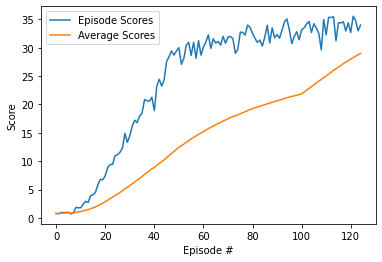

In [4]:
# plot the scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episode_scores)), episode_scores)
plt.plot(np.arange(len(average_scores)), average_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(["Episode Scores", "Average Scores"])
plt.show()

In [5]:
env.close()

# 6. Watch a smart Agent

If you trained the agent or you just want to see a trained agent behavior, restart the notebook and run the section below.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform
from src.agent import Agent
from collections import deque

platform_files = {"Windows":r".\ENVs\Reacher_Windows_x86_64\Reacher.exe",
                 "Linux":r"./ENVs/Reacher_Linux/Reacher_Linux/Reacher.x86_64",
                 "Darwin":r"./ENVs/Reacher.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file) #, no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)
num_agents = len(env_info.agents)

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)
agent.load_brain()

for _ in range(1):
    # reset the unity environment
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    # reset the agent for the new episode
    agent.reset()
    agent_scores = np.zeros(num_agents)
    while True:
        # determine actions for the unity agents from current sate
        actions = agent.act(states)

        # send the actions to the unity agents in the environment and receive resultant environment information
        env_info = env.step(actions)[brain_name]

        next_states = env_info.vector_observations  # get the next states for each unity agent in the environment
        rewards = env_info.rewards  # get the rewards for each unity agent in the environment
        dones = env_info.local_done  # see if episode has finished for each unity agent in the environment

        # set new states to current states for determining next actions
        states = next_states

        # Update episode score for each unity agent
        agent_scores += rewards

        # If any unity agent indicates that the episode is done,
        # then exit episode loop, to begin new episode
        if np.any(dones):
            break
    print(f"Agents average score: {agent_scores.mean():.2f}")
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Agents average score: 33.05
